In [1]:
import matplotlib.pyplot as plt

In [2]:
def open_log(filepath):
    with open(filepath, 'r') as f:
        column_names = f.readline().split()

        d = {c : [] for c in column_names}
        for line in f:
            for c, val in zip(column_names, line.split()):
                d[c].append(float(val))
    return d

In [3]:
base_ppo = open_log("./base_ppo_results/progress.txt")
teacher_assist = open_log("./teacher_assist_ppo_results/progress.txt")
automated_recovery = open_log("./automated_recovery_ppo_results/progress.txt")

In [4]:
automated_recovery.keys()

dict_keys(['Epoch', 'AverageEpRet', 'StdEpRet', 'MaxEpRet', 'MinEpRet', '%Crash', 'EpLen', 'AverageVVals', 'StdVVals', 'MaxVVals', 'MinVVals', 'TotalEnvInteracts', 'LossPi', 'LossV', 'DeltaLossPi', 'DeltaLossV', 'Entropy', 'KL', 'ClipFrac', 'StopIter', 'Time'])

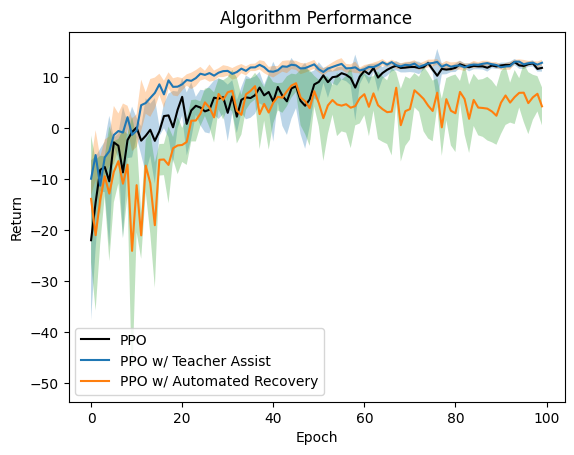

In [8]:
plt.fill_between(
    base_ppo['Epoch'],
    [a - b for a, b in zip(base_ppo['AverageEpRet'], base_ppo['StdEpRet'])],
    [a + b for a, b in zip(base_ppo['AverageEpRet'], base_ppo['StdEpRet'])],
    alpha=0.3
)
plt.plot(base_ppo['Epoch'], base_ppo['AverageEpRet'], 'k-', label='PPO')

plt.fill_between(
    teacher_assist['Epoch'],
    [a - b for a, b in zip(teacher_assist['AverageEpRet'], teacher_assist['StdEpRet'])],
    [a + b for a, b in zip(teacher_assist['AverageEpRet'], teacher_assist['StdEpRet'])],
    alpha=0.3
)
plt.plot(teacher_assist['Epoch'], teacher_assist['AverageEpRet'], label='PPO w/ Teacher Assist')

plt.fill_between(
    automated_recovery['Epoch'],
    [a - b for a, b in zip(automated_recovery['AverageEpRet'], automated_recovery['StdEpRet'])],
    [a + b for a, b in zip(automated_recovery['AverageEpRet'], automated_recovery['StdEpRet'])],
    alpha=0.3
)
plt.plot(automated_recovery['Epoch'], automated_recovery['AverageEpRet'], label='PPO w/ Automated Recovery')

plt.title("Algorithm Performance")
plt.xlabel("Epoch")
plt.ylabel("Return")
plt.legend()
plt.show()

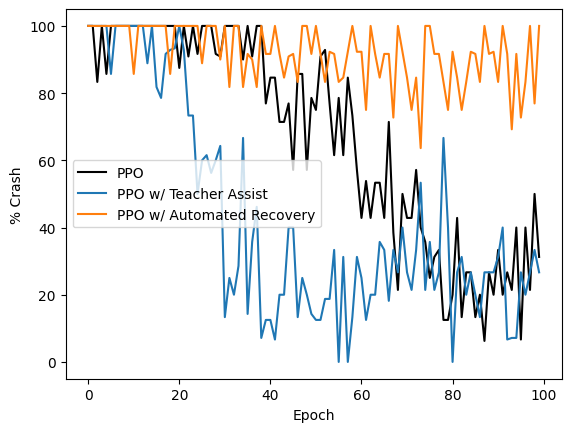

In [6]:
plt.plot(base_ppo['Epoch'], base_ppo['%Crash'], 'k-', label='PPO')
plt.plot(teacher_assist['Epoch'], teacher_assist['%Crash'], label='PPO w/ Teacher Assist')
plt.plot(automated_recovery['Epoch'], automated_recovery['%Crash'], label='PPO w/ Automated Recovery')

plt.xlabel("Epoch")
plt.ylabel("% Crash")
plt.legend()
plt.show()